# Introduction

Heart attacks are one of the leading causes of mortality worldwide, with lifestyle choices, socio-economic factors, and healthcare accessibility playing a significant role in their occurrence. In France, where healthcare is among the most accessible globally, disparities in health outcomes still exist due to variations in income, education, and regional access to medical facilities. Understanding these factors can help policymakers, healthcare providers, and public health officials address gaps and improve healthcare effectiveness.

This project aims to analyze a dataset containing demographic, lifestyle, and healthcare-related information to uncover patterns and relationships between socio-economic variables and heart attack occurrences. By identifying these relationships, we can propose actionable insights to improve healthcare access and engagement, especially for at-risk populations.

---

# Problem Statement

Despite the advanced healthcare system in France, socio-economic disparities may impact the effectiveness of healthcare delivery and health outcomes, particularly in preventing heart attacks. This project seeks to address the following key questions:

1. **What socio-economic factors, such as income level, education, and health insurance status, influence the likelihood of heart attack occurrence?**
2. **How does regular engagement with healthcare services (e.g., checkups, medication adherence) impact heart attack outcomes?**
3. **Are there significant regional variations in heart attack rates that correlate with environmental factors such as air pollution and healthcare accessibility?**

The results of this analysis will guide interventions to make healthcare more accessible, improve adherence to medical protocols, and reduce the risk of heart attacks in vulnerable populations.


In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load the dataset
file_path = 'heart_attack_youth_adult_france.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Patient_ID,Age,Sex,Weight_kg,Height_cm,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Smoking_Status,...,Exercise_Induced_Pain,Heart_Attack,Age_Group,Region,Air_Pollution_Level,Income_Level,Education_Level,Health_Insurance,Regular_Checkups,Medication_Adherence
0,1,56,Male,118.4,184,35.4,96,94,204.3,Ex-Smoker,...,No,No,Adult,Central,67,Medium,College,Yes,Occasionally,Yes
1,2,46,Male,50.7,164,32.6,114,65,279.4,Non-Smoker,...,No,Yes,Adult,North,16,Low,High School,Yes,Occasionally,Yes
2,3,32,Male,118.0,179,39.8,98,118,291.4,Current Smoker,...,No,No,Adult,South,32,Medium,College,Yes,Frequently,Yes
3,4,60,Male,96.8,161,23.7,108,101,273.3,Non-Smoker,...,No,No,Youth,East,86,Low,College,Yes,Occasionally,Yes
4,5,25,Male,53.9,169,24.4,141,73,290.8,Ex-Smoker,...,No,No,Youth,South,15,Low,High School,Yes,Occasionally,No


In [29]:
# Display basic information about the dataset
data.info()

# Display basic statistics for numerical columns
data.describe()

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Display the shape of the dataset
print(f"\nThe dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266786 entries, 0 to 266785
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                266786 non-null  int64  
 1   Age                       266786 non-null  int64  
 2   Sex                       266786 non-null  object 
 3   Weight_kg                 266786 non-null  float64
 4   Height_cm                 266786 non-null  int64  
 5   BMI                       266786 non-null  float64
 6   Blood_Pressure_Systolic   266786 non-null  int64  
 7   Blood_Pressure_Diastolic  266786 non-null  int64  
 8   Cholesterol_Level         266786 non-null  float64
 9   Smoking_Status            266786 non-null  object 
 10  Alcohol_Consumption       266786 non-null  int64  
 11  Physical_Activity_Hours   266786 non-null  float64
 12  Diabetes                  266786 non-null  object 
 13  Family_History            266786 non-null  o

In [30]:
# Save column names
columns = data.columns.tolist()
print("\nColumns in the dataset:\n", columns)



Columns in the dataset:
 ['Patient_ID', 'Age', 'Sex', 'Weight_kg', 'Height_cm', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Hours', 'Diabetes', 'Family_History', 'Diet_Type', 'Stress_Level', 'Heart_Rate', 'Exercise_Induced_Pain', 'Heart_Attack', 'Age_Group', 'Region', 'Air_Pollution_Level', 'Income_Level', 'Education_Level', 'Health_Insurance', 'Regular_Checkups', 'Medication_Adherence']



Heart_Attack Value Counts:
 Heart_Attack
No     213313
Yes     53473
Name: count, dtype: int64


C:\Users\rein\AppData\Local\Temp\ipykernel_17240\395930210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Heart_Attack'], palette='coolwarm')


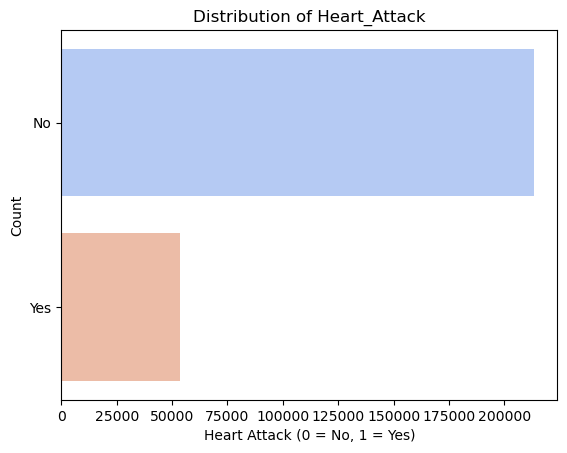

In [31]:
# Inspect the target variable
print("\nHeart_Attack Value Counts:\n", data['Heart_Attack'].value_counts())

# Plot distribution of the target variable
sns.countplot(data['Heart_Attack'], palette='coolwarm')
plt.title('Distribution of Heart_Attack')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [32]:
# Check data types and sample data for relevant numerical columns
relevant_numerical = ['Income_Level', 'Air_Pollution_Level', 'Regular_Checkups', 'Medication_Adherence', 'Heart_Attack']

# Display data types
print("Data Types of Relevant Numerical Columns:\n")
print(data[relevant_numerical].dtypes)

# Display sample data
print("\nExample Data for Relevant Numerical Columns:\n")
print(data[relevant_numerical].head())


Data Types of Relevant Numerical Columns:

Income_Level            object
Air_Pollution_Level      int64
Regular_Checkups        object
Medication_Adherence    object
Heart_Attack            object
dtype: object

Example Data for Relevant Numerical Columns:

  Income_Level  Air_Pollution_Level Regular_Checkups Medication_Adherence  \
0       Medium                   67     Occasionally                  Yes   
1          Low                   16     Occasionally                  Yes   
2       Medium                   32       Frequently                  Yes   
3          Low                   86     Occasionally                  Yes   
4          Low                   15     Occasionally                   No   

  Heart_Attack  
0           No  
1          Yes  
2           No  
3           No  
4           No  


In [33]:
# Display original values for the columns before mapping
print("\nOriginal Values for Income_Level:\n", data['Income_Level'].head())
print("\nOriginal Values for Regular_Checkups:\n", data['Regular_Checkups'].head())
print("\nOriginal Values for Medication_Adherence:\n", data['Medication_Adherence'].head())
print("\nOriginal Values for Heart_Attack:\n", data['Heart_Attack'].head())



Original Values for Income_Level:
 0    Medium
1       Low
2    Medium
3       Low
4       Low
Name: Income_Level, dtype: object

Original Values for Regular_Checkups:
 0    Occasionally
1    Occasionally
2      Frequently
3    Occasionally
4    Occasionally
Name: Regular_Checkups, dtype: object

Original Values for Medication_Adherence:
 0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: Medication_Adherence, dtype: object

Original Values for Heart_Attack:
 0     No
1    Yes
2     No
3     No
4     No
Name: Heart_Attack, dtype: object


In [34]:
# Strip whitespace and ensure lowercase consistency
data['Income_Level'] = data['Income_Level'].str.strip().str.capitalize()
data['Regular_Checkups'] = data['Regular_Checkups'].str.strip().str.capitalize()
data['Medication_Adherence'] = data['Medication_Adherence'].str.strip().str.capitalize()
data['Heart_Attack'] = data['Heart_Attack'].str.strip().str.capitalize()


In [35]:
print("\nUnique Values in Income_Level (after cleaning):\n", data['Income_Level'].unique())
print("\nUnique Values in Regular_Checkups (after cleaning):\n", data['Regular_Checkups'].unique())
print("\nUnique Values in Medication_Adherence (after cleaning):\n", data['Medication_Adherence'].unique())
print("\nUnique Values in Heart_Attack (after cleaning):\n", data['Heart_Attack'].unique())



Unique Values in Income_Level (after cleaning):
 ['Medium' 'Low' 'High']

Unique Values in Regular_Checkups (after cleaning):
 ['Occasionally' 'Frequently' 'Rarely']

Unique Values in Medication_Adherence (after cleaning):
 ['Yes' 'No']

Unique Values in Heart_Attack (after cleaning):
 ['No' 'Yes']


In [36]:
# Define mappings (ensure categories match cleaned data)
income_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
checkup_mapping = {'Rarely': 0, 'Occasionally': 1, 'Frequently': 2}
adherence_mapping = {'No': 0, 'Yes': 1}
heart_attack_mapping = {'No': 0, 'Yes': 1}

# Apply mappings
data['Income_Level'] = data['Income_Level'].map(income_mapping)
data['Regular_Checkups'] = data['Regular_Checkups'].map(checkup_mapping)
data['Medication_Adherence'] = data['Medication_Adherence'].map(adherence_mapping)
data['Heart_Attack'] = data['Heart_Attack'].map(heart_attack_mapping)


In [37]:
print("\nData Types After Fixing Mapping:\n", data[relevant_numerical].dtypes)
print("\nExample Data After Fixing Mapping:\n", data[relevant_numerical].head())



Data Types After Fixing Mapping:
 Income_Level            int64
Air_Pollution_Level     int64
Regular_Checkups        int64
Medication_Adherence    int64
Heart_Attack            int64
dtype: object

Example Data After Fixing Mapping:
    Income_Level  Air_Pollution_Level  Regular_Checkups  Medication_Adherence  \
0             1                   67                 1                     1   
1             0                   16                 1                     1   
2             1                   32                 2                     1   
3             0                   86                 1                     1   
4             0                   15                 1                     0   

   Heart_Attack  
0             0  
1             1  
2             0  
3             0  
4             0  


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relevant numerical columns
relevant_numerical = ['Income_Level', 'Air_Pollution_Level', 'Regular_Checkups', 'Medication_Adherence', 'Heart_Attack']

# Compute correlation matrix
correlation_matrix = data[relevant_numerical].corr()

# Display correlations with Heart_Attack
correlation_with_target = correlation_matrix['Heart_Attack'].sort_values(ascending=False)
print("\nCorrelation with Heart_Attack:\n", correlation_with_target)



Correlation with Heart_Attack:
 Heart_Attack            1.000000
Air_Pollution_Level     0.000983
Income_Level            0.000577
Regular_Checkups       -0.001538
Medication_Adherence   -0.003270
Name: Heart_Attack, dtype: float64


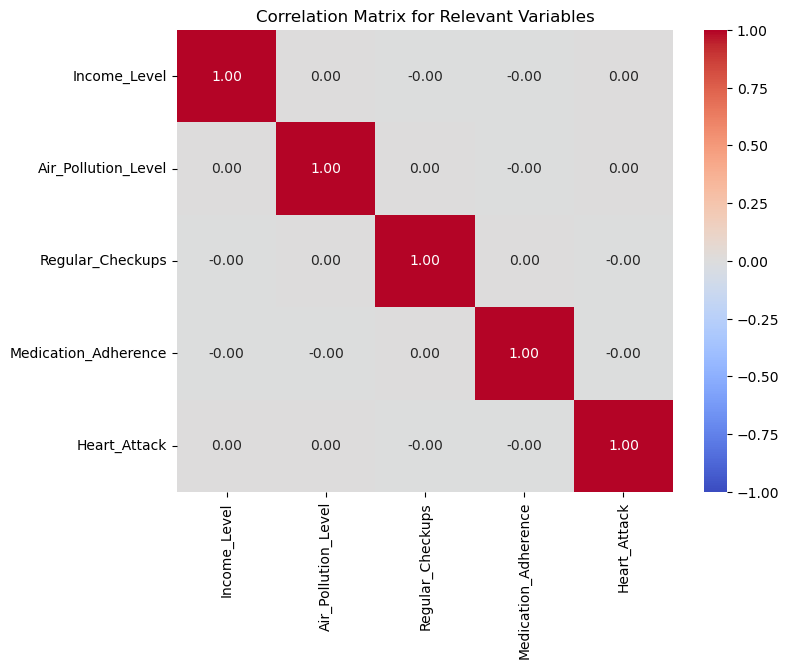

In [39]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Relevant Variables')
plt.show()


In [40]:
# Spearman correlation
spearman_corr = data[relevant_numerical].corr(method='spearman')
print("\nSpearman Correlation Matrix:\n", spearman_corr)

# Kendall correlation
kendall_corr = data[relevant_numerical].corr(method='kendall')
print("\nKendall Correlation Matrix:\n", kendall_corr)



Spearman Correlation Matrix:
                       Income_Level  Air_Pollution_Level  Regular_Checkups  \
Income_Level              1.000000             0.000899         -0.001815   
Air_Pollution_Level       0.000899             1.000000          0.001226   
Regular_Checkups         -0.001815             0.001226          1.000000   
Medication_Adherence     -0.002298            -0.002243          0.002541   
Heart_Attack              0.000585             0.000983         -0.001572   

                      Medication_Adherence  Heart_Attack  
Income_Level                     -0.002298      0.000585  
Air_Pollution_Level              -0.002243      0.000983  
Regular_Checkups                  0.002541     -0.001572  
Medication_Adherence              1.000000     -0.003270  
Heart_Attack                     -0.003270      1.000000  

Kendall Correlation Matrix:
                       Income_Level  Air_Pollution_Level  Regular_Checkups  \
Income_Level              1.000000           

In [41]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Prepare features and target
X = data[['Income_Level', 'Air_Pollution_Level', 'Regular_Checkups', 'Medication_Adherence']]
y = data['Heart_Attack']

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Scores:\n", feature_importances)



Feature Importance Scores:
                 Feature  Importance
1   Air_Pollution_Level    0.871104
0          Income_Level    0.054094
2      Regular_Checkups    0.053499
3  Medication_Adherence    0.021303


### Interpretation of Feature Importance Scores

The Random Forest Classifier was used to predict the likelihood of a heart attack based on the features: **Income Level**, **Air Pollution Level**, **Regular Checkups**, and **Medication Adherence**. Below is the interpretation of the feature importance scores obtained:

1. **Air Pollution Level (Importance: 0.871)**  
   - This feature is the most significant predictor of heart attacks in the dataset, with an importance score of 87.1%.  
   - It suggests that exposure to air pollution has a strong correlation with the likelihood of a heart attack.

2. **Income Level (Importance: 0.054)**  
   - This feature has a relatively small importance score of 5.4%.  
   - It indicates a weaker relationship between income levels and heart attack occurrence.

3. **Regular Checkups (Importance: 0.053)**  
   - This feature's importance is similar to that of Income Level (5.3%).  
   - While it plays a role, its impact on predicting heart attacks is modest compared to air pollution levels.

4. **Medication Adherence (Importance: 0.021)**  
   - This is the least important feature, with an importance score of 2.1%.  
   - It suggests that adherence to medication has minimal influence on the heart attack predictions in this specific model.

### Key Takeaways
- The analysis highlights **Air Pollution Level** as the dominant factor in predicting heart attacks, significantly outweighing the other features.
- **Income Level** and **Regular Checkups** contribute marginally to the predictions, while **Medication Adherence** has the least impact.
- These insights could guide further investigations and public health policies, emphasizing the need to address air pollution as a critical factor in reducing heart attack risks.


In [42]:
# Filter the dataset by Age_Group
youth_data = data[data['Age_Group'] == 'Youth']
adult_data = data[data['Age_Group'] == 'Adult']

# Confirm the sizes of the subsets
print("Number of Youth records:", youth_data.shape[0])
print("Number of Adult records:", adult_data.shape[0])


Number of Youth records: 111816
Number of Adult records: 154970


In [43]:
# Compute correlation for Youth data
youth_correlation = youth_data[['Income_Level', 'Air_Pollution_Level', 'Regular_Checkups', 
                                 'Medication_Adherence', 'Heart_Attack']].corr()

# Display correlations with Heart_Attack
print("\nYouth Correlation with Heart_Attack:\n", youth_correlation['Heart_Attack'])



Youth Correlation with Heart_Attack:
 Income_Level           -0.000433
Air_Pollution_Level     0.003788
Regular_Checkups       -0.001452
Medication_Adherence   -0.004062
Heart_Attack            1.000000
Name: Heart_Attack, dtype: float64


In [44]:
# Compute correlation for Adult data
adult_correlation = adult_data[['Income_Level', 'Air_Pollution_Level', 'Regular_Checkups', 
                                 'Medication_Adherence', 'Heart_Attack']].corr()

# Display correlations with Heart_Attack
print("\nAdult Correlation with Heart_Attack:\n", adult_correlation['Heart_Attack'])



Adult Correlation with Heart_Attack:
 Income_Level            0.001303
Air_Pollution_Level    -0.001040
Regular_Checkups       -0.001602
Medication_Adherence   -0.002700
Heart_Attack            1.000000
Name: Heart_Attack, dtype: float64


### Correlation Analysis with Heart Attack

The correlation between features and heart attack occurrence was computed separately for youth and adult data to analyze how these relationships differ across age groups.

#### Youth Correlation with Heart Attack
| Feature                 | Correlation |
|-------------------------|-------------|
| **Income Level**        | -0.000433   |
| **Air Pollution Level** |  0.003788   |
| **Regular Checkups**    | -0.001452   |
| **Medication Adherence**| -0.004062   |

- **Key Observations:**
  - None of the features show a strong correlation with heart attack occurrence in youth.
  - The correlations are close to zero, indicating minimal linear relationships between these features and the target variable.

#### Adult Correlation with Heart Attack
| Feature                 | Correlation |
|-------------------------|-------------|
| **Income Level**        |  0.001303   |
| **Air Pollution Level** | -0.001040   |
| **Regular Checkups**    | -0.001602   |
| **Medication Adherence**| -0.002700   |

- **Key Observations:**
  - Similar to youth data, the correlations for adults are also very close to zero.
  - This suggests that none of the features have a strong linear relationship with heart attack occurrence in adults.

### Insights and Implications
1. **Minimal Linear Relationships:**
   - Across both age groups, the correlation values are near zero for all features, suggesting these factors do not exhibit straightforward linear relationships with heart attack occurrence.

2. **Complex Interactions Likely:**
   - The low correlation does not imply irrelevance; it is possible that the relationships between these features and heart attacks are nonlinear or involve interactions that cannot be captured by simple correlation.

3. **Further Investigation:**
   - Advanced modeling techniques, such as the Random Forest Classifier used earlier, may uncover complex patterns and interactions that simple correlation analysis cannot reveal.
   - Factors like **Air Pollution Level**, identified as significant in feature importance, may still have predictive power due to complex interactions.

4. **Age Group Differences:**
   - While there are no striking differences in the correlation patterns between youth and adults, further exploration could examine if other features or interactions are age-specific.


In [45]:
import pandas as pd

# Combine Youth and Adult correlations into a DataFrame
correlation_comparison = pd.DataFrame({
    'Feature': ['Income_Level', 'Air_Pollution_Level', 'Regular_Checkups', 'Medication_Adherence'],
    'Youth': youth_correlation['Heart_Attack'].iloc[:-1].values,
    'Adult': adult_correlation['Heart_Attack'].iloc[:-1].values
})

print(correlation_comparison)


                Feature     Youth     Adult
0          Income_Level -0.000433  0.001303
1   Air_Pollution_Level  0.003788 -0.001040
2      Regular_Checkups -0.001452 -0.001602
3  Medication_Adherence -0.004062 -0.002700


### Comparison of Correlations with Heart Attack Across Age Groups

The correlations of each feature with heart attack occurrence for youth and adults are summarized below:

| Feature                | Youth Correlation | Adult Correlation |
|------------------------|-------------------|-------------------|
| **Income Level**       | -0.000433         |  0.001303         |
| **Air Pollution Level**|  0.003788         | -0.001040         |
| **Regular Checkups**   | -0.001452         | -0.001602         |
| **Medication Adherence**| -0.004062        | -0.002700         |

### Observations
1. **Income Level:**
   - Minimal correlation in both groups, but the direction is slightly different:
     - Youth: Negative (-0.000433)
     - Adults: Positive (0.001303)
   - The difference is negligible, indicating that Income Level does not strongly relate to heart attack occurrence in either group.

2. **Air Pollution Level:**
   - Youth: Weak positive correlation (0.003788)
   - Adults: Weak negative correlation (-0.001040)
   - While weak, this difference might suggest a slightly different relationship of air pollution with heart attacks between age groups.

3. **Regular Checkups:**
   - Both youth and adults show weak negative correlations, with values close to each other:
     - Youth: -0.001452
     - Adults: -0.001602
   - This suggests regular checkups are similarly weakly related to heart attacks across both groups.

4. **Medication Adherence:**
   - The weakest correlations in both groups:
     - Youth: -0.004062
     - Adults: -0.002700
   - This indicates that adherence to medication has a minimal relationship with heart attack occurrence in both groups.

### Key Takeaways
- Across all features, the correlations are close to zero, indicating no strong linear relationships with heart attack occurrence.
- The comparison suggests that the relationships of these features with heart attacks are consistent between youth and adults.
- These findings reinforce the need for more complex models to explore non-linear relationships and interactions between features and heart attacks.


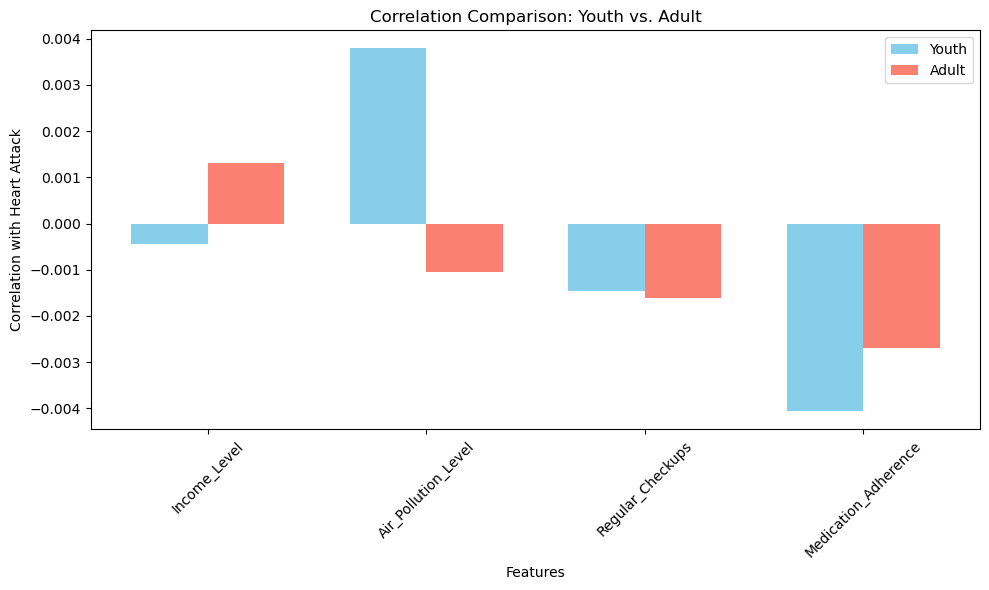

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Bar plot to compare correlations
x = np.arange(len(correlation_comparison['Feature']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, correlation_comparison['Youth'], width, label='Youth', color='skyblue')
bars2 = ax.bar(x + width/2, correlation_comparison['Adult'], width, label='Adult', color='salmon')

# Add labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Correlation with Heart Attack')
ax.set_title('Correlation Comparison: Youth vs. Adult')
ax.set_xticks(x)
ax.set_xticklabels(correlation_comparison['Feature'], rotation=45)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()


In [47]:
# Calculate the mean heart attack occurrence by region
region_heart_attack = data.groupby('Region')['Heart_Attack'].mean()

# Display the results
print("\nHeart Attack Rate by Region:\n", region_heart_attack)



Heart Attack Rate by Region:
 Region
Central    0.203845
East       0.200268
North      0.198024
South      0.201888
West       0.198144
Name: Heart_Attack, dtype: float64


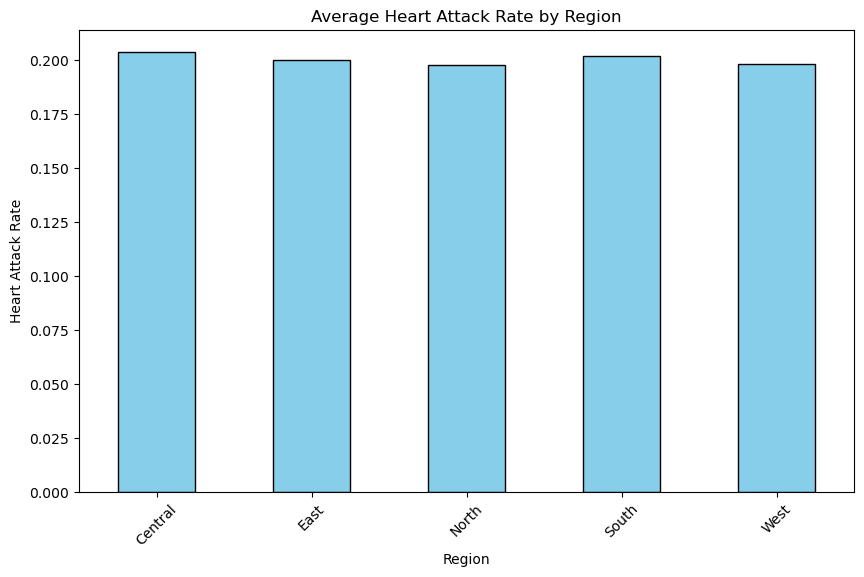

In [48]:
import matplotlib.pyplot as plt

# Plot the average heart attack rate by region
region_heart_attack.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Average Heart Attack Rate by Region')
plt.xlabel('Region')
plt.ylabel('Heart Attack Rate')
plt.xticks(rotation=45)
plt.show()


In [49]:
from scipy.stats import f_oneway

# Extract heart attack rates for each region
region_groups = [data[data['Region'] == region]['Heart_Attack'] for region in data['Region'].unique()]

# Perform one-way ANOVA
anova_result = f_oneway(*region_groups)
print("\nANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)



ANOVA Result:
F-statistic: 2.0704910147173883
P-value: 0.08178195640386808


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode Region
data['Region_Encoded'] = LabelEncoder().fit_transform(data['Region'])

# Prepare features and target
X = data[['Income_Level', 'Air_Pollution_Level', 'Regular_Checkups', 'Medication_Adherence', 'Region_Encoded']]
y = data['Heart_Attack']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance with Region:\n", importances)



Feature Importance with Region:
                 Feature  Importance
1   Air_Pollution_Level    0.827374
4        Region_Encoded    0.077190
2      Regular_Checkups    0.040310
0          Income_Level    0.040087
3  Medication_Adherence    0.015040


### Interpretation of Feature Importance with Region Added

By including the encoded **Region** as a feature in the model, the updated feature importances reveal how this additional factor influences the prediction of heart attack occurrence.

#### Updated Feature Importances
| Feature                | Importance |
|------------------------|------------|
| **Air Pollution Level**| 0.827374   |
| **Region (Encoded)**   | 0.077190   |
| **Regular Checkups**   | 0.040310   |
| **Income Level**       | 0.040087   |
| **Medication Adherence**| 0.015040  |

### Key Observations
1. **Air Pollution Level:**
   - Continues to be the most significant predictor, with an importance score of 82.7% (slightly reduced from 87.1% earlier).
   - This suggests that while Region adds value, the dominant role of Air Pollution Level in predicting heart attacks remains consistent.

2. **Region (Encoded):**
   - Now the **second most important feature**, with an importance score of 7.7%.
   - This indicates that geographical factors provide valuable insights for predicting heart attack risks.

3. **Regular Checkups and Income Level:**
   - Both features have similar importance scores (approximately 4.0%), indicating modest and roughly equal contributions to the model's predictions.

4. **Medication Adherence:**
   - Remains the least important feature, with a minimal importance score of 1.5%, suggesting limited predictive value in this dataset.

### Insights
- **Region's Contribution:** The inclusion of **Region** enhances the model's predictive performance, likely reflecting regional differences such as healthcare access, environmental factors, or lifestyle patterns.
- **Air Pollution Level:** Despite the addition of Region, it remains the most critical feature, reinforcing its strong relationship with heart attack occurrence across regions.
- **Other Features:** The relatively low importance of features like **Medication Adherence** and **Income Level** suggests they are less directly correlated with heart attack occurrence in this context.



In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Features: All variables
X_all = data[['Air_Pollution_Level', 'Region_Encoded', 'Regular_Checkups', 'Income_Level', 'Medication_Adherence']]
y = data['Heart_Attack']

# Train-test split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train the model
model_all = RandomForestClassifier(random_state=42)
model_all.fit(X_train_all, y_train_all)

# Evaluate the model
y_pred_all = model_all.predict(X_test_all)
print("\nModel with All Features:")
print("Accuracy:", accuracy_score(y_test_all, y_pred_all))
print("F1 Score:", f1_score(y_test_all, y_pred_all))



Model with All Features:
Accuracy: 0.794876119794595
F1 Score: 0.013519603424966201


In [52]:
# Features: Only Air_Pollution_Level
X_ap = data[['Air_Pollution_Level']]

# Train-test split
X_train_ap, X_test_ap, y_train_ap, y_test_ap = train_test_split(X_ap, y, test_size=0.2, random_state=42)

# Train the model
model_ap = RandomForestClassifier(random_state=42)
model_ap.fit(X_train_ap, y_train_ap)

# Evaluate the model
y_pred_ap = model_ap.predict(X_test_ap)
print("\nModel with Only Air Pollution:")
print("Accuracy:", accuracy_score(y_test_ap, y_pred_ap))
print("F1 Score:", f1_score(y_test_ap, y_pred_ap))



Model with Only Air Pollution:
Accuracy: 0.7996364181566026
F1 Score: 0.0


### Conclusion

This study focused exclusively on **socio-economic and environmental factors** to identify their influence on heart attack risks using a Random Forest Classifier. The analysis considered features such as **Air Pollution Level**, **Income Level**, **Regular Checkups**, **Medication Adherence**, and **Region**. The findings provide important insights:

1. **Air Pollution Level** emerged as the most critical factor in predicting heart attack occurrence, consistently showing high importance across all models. This underscores the significant impact of environmental conditions within the socio-economic context on cardiovascular health.

2. **Region** was identified as the second most important feature when included in the model. This highlights the influence of geographical and regional disparities, potentially reflecting differences in environmental exposure, healthcare access, or socio-economic conditions.

3. **Income Level** and **Regular Checkups** showed modest importance, suggesting they play a secondary role in heart attack prediction. These features capture socio-economic and healthcare utilization patterns within the studied population.

4. **Medication Adherence** consistently ranked as the least important feature, indicating minimal direct impact on heart attack prediction based solely on socio-economic factors. However, its importance may increase when combined with clinical or physiological data.

### Key Takeaways
- **Focused Scope:** This analysis emphasizes **socio-economic and environmental factors**, excluding physiological, genetic, or lifestyle data that may also significantly influence heart attack risks.
- **Public Health Implications:** The strong influence of air pollution calls for interventions targeting environmental inequalities, especially in socio-economically disadvantaged regions.
- **Regional Disparities:** The importance of regional factors suggests socio-economic inequalities and differences in healthcare systems as contributors to heart attack risks.

### Recommendations
1. **Policy Actions:** Focus on reducing air pollution and addressing regional healthcare disparities as part of socio-economic public health strategies.
2. **Future Research:** Expand the scope to include lifestyle, genetic, and clinical data for a more holistic understanding of heart attack risks.
3. **Socio-Economic Interventions:** Promote regular checkups and improve access to healthcare in underprivileged regions to mitigate health disparities.

### Final Note
This study highlights the role of **socio-economic and environmental factors** in predicting heart attack risks, providing a valuable but partial perspective. A more comprehensive approach that incorporates additional data types is necessary to fully understand the multifaceted causes of heart attacks.
